In [1]:
!python -m pytest

============================= test session starts ==============================
platform darwin -- Python 3.6.8, pytest-4.4.1, py-1.8.0, pluggy-0.9.0
rootdir: /Users/dylanpeifer/Documents/programs/deepgroebner
collected 163 items                                                            

tests/test_buchberger.py ............................................... [ 28%]
........................................................................ [ 73%]
.........................                                                [ 88%]
tests/test_hilbert.py .......                                            [ 92%]
tests/test_pg.py ............                                            [100%]

========================== 163 passed in 3.62 seconds ==========================


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

from agents.pg import PGAgent
from agents.networks import ParallelMultilayerPerceptron, PairsLeft
from environments.buchberger import BuchbergerEnv, LeadMonomialsWrapper
from environments.ideals import random_binomial_ideal

In [3]:
R = sp.ring('x,y,z', sp.FF(32003), 'grevlex')[0]
f = lambda R: random_binomial_ideal(R, 2, 5, homogeneous=True)
env = LeadMonomialsWrapper(BuchbergerEnv(f, ring=R, elimination='none'))
policy = ParallelMultilayerPerceptron(6, [24])
value = PairsLeft(6, gam=1.0)
agent = PGAgent(policy, policy_learning_rate=0.0001, value_network=value, gam=1.0, lam=1.0)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [4]:
r = agent.train(env, 1000, epochs=25, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch: 25/25 - avg_reward: -31.501

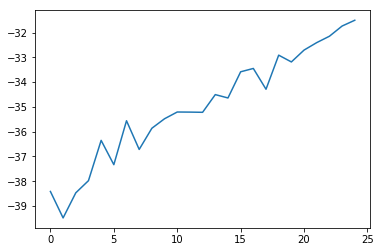

In [5]:
plt.plot(r)